<a href="https://colab.research.google.com/github/AquaIsLove/Neural-networks/blob/main/LinearRegression/Main3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random 

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
%matplotlib inline

In [ ]:
class LinearRegression():
  def __init__(self, lr, epochs, w = random.uniform(-5,5), w0 = random.uniform(-5,5), B = 0.9):
    self.lr = lr
    self.epochs = epochs
    self.w = w
    self.w0 = w0
    self.w_first = w
    self.w0_first = w0
    self.B = B

  def fit(self,X,Y):
    Vdw = 0
    Vdw0 = 0
    for e in range(self.epochs):
      for x,y in zip(X,Y):
        y_new = self.w*x+self.w0

        dEdw = -2*(y-y_new)*x
        dEdw0 = -2*(y-y_new)

        Vdw = self.B * Vdw + (1-self.B)*dEdw
        Vdw0 = self.B * Vdw0 + (1-self.B)*dEdw0

        self.w = self.w - lr*Vdw
        self.w0 = self.w0 - lr*Vdw0





  def predict(self,X):
    return [self.w*x+self.w0 for x in X]

  def MSE(self,X,Y):
    res = 0 
    mass = self.predict(X) 
    for i in range(len(X)):
      res+=(Y[i]-mass[i])**2
    res/=len(X)
    return res 

  def MAE(self,X,Y):
    res = 0
    mass = self.predict(X) 
    for i in range(len(X)):
      res+=abs(Y[i] - mass[i])
    res/=len(X)
    return res

  # def R_pow_2(self,X,Y):


In [ ]:
lr = 0.0001

epochs = 10000



X_train = [1.3,3.5,4,7.5,8.5,9]
Y_train = [4.38,10.1,11.3,18.5,19.3,21.4]

X_test = [2,6]
Y_test = [7,14.2]

In [ ]:
model = LinearRegression(lr,epochs)
model.fit(X_train,Y_train)

print(f'Начальное значение коэффициента: w = {model.w_first}')

print(f'Получившееся значение коэффициента: w = {model.w}')

print(f'Начальное значение коэффициента: w0 = {model.w0_first}')

print(f'Получившееся значение коэффициента: w0 = {model.w0}')



Начальное значение коэффициента: w = -2.3558085261602644
Получившееся значение коэффициента: w = 2.171342643973767
Начальное значение коэффициента: w0 = -4.093154340465146
Получившееся значение коэффициента: w0 = 1.828795905056784


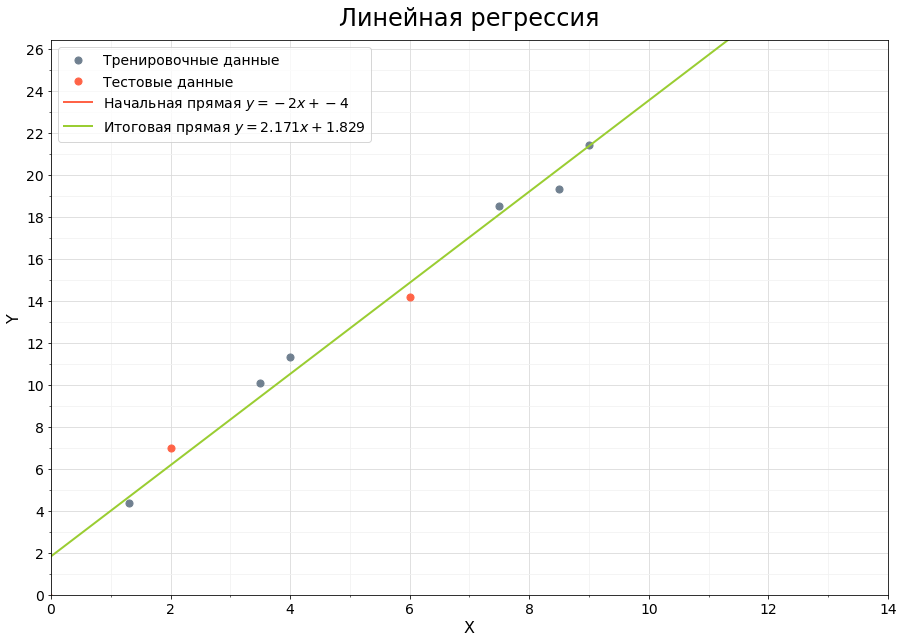

In [ ]:

xlim = (0, X_train[-1]+5)
ylim = (0, Y_train[-1]+5)

fig, ax = plt.subplots(figsize=(15,10), dpi=72)
ax.set_title('Линейная регрессия', pad='15', fontsize=24)

ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

ax.set(xlim=xlim, ylim=ylim)

ax.tick_params(axis='both', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.grid(True, color='0.85', linestyle='-')
ax.grid(which='minor', color='0.95', linestyle='-')

ax.scatter(X_train, Y_train,
           color='slategrey', 
           s=50, zorder=2,
           label='Тренировочные данные')

ax.scatter(X_test, Y_test,
           color='tomato', 
           s=50, zorder=2,
           label='Тестовые данные')

ax.plot(xlim, [model.w_first*x for x in xlim], 
        'tomato', linewidth=2, 
        label=f'Начальная прямая $y = {round(model.w_first)}x + {round(model.w0_first)}$')

ax.plot(xlim, model.predict(xlim), 
        'yellowgreen', linewidth=2, 
        label=f'Итоговая прямая $y = {round(model.w, 3)}x+{round(model.w0,3)}$')

ax.legend(loc='best', fontsize=14)

plt.show()



In [ ]:
print(f"MSE = {model.MSE(X_test,Y_test)}")

print(f"MAE = {model.MAE(X_test,Y_test)}")


MSE = 0.5589488299259011
MAE = 0.7426852879475345
